![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 7: Erros do polinômio interpolador

## Questão 1: os métodos

Escreva uma função que retorna os coeficientes do polinômio interpolador,
dadas duas listas (ou `np.array`s) para $x_i$ e $y_i$.

Use esta função para criar uma outra, que retorna uma função
"naturalmente" vetorizada (ou seja, sem usar `np.vectorize`)
que calcula esse polinômio interpolador.

In [2]:
def lagrange_coefs(xs, ys):
    """ 
    Coeficientes (em ordem crescente) do polinômio interpolador dos pontos (x_i, y_i).
    """
    assert(len(xs) == len(ys))
    inverse_vander_M = np.linalg.inv(np.vander(xs, len(xs)))
    return np.flip(np.matmul(inverse_vander_M, ys))

def lagrange(xs, ys):
    """ 
    Retorna uma função que calcula polinômio interpolador de Lagrange dos pontos (x_i, y_i). 
    """
    coefs = lagrange_coefs(xs, ys)
    return lambda x: sum([coefs[i]*x**i for i in range(len(xs))])

In [3]:
c = lagrange_coefs([1,2,3], [4,5,7])
assert np.allclose(c, [4, -1/2, 1/2], atol=1e-14, rtol=1e-14)

In [4]:
p = lagrange([1,2,3], [4,5,7])
assert np.isclose(p(0), 4, atol=1e-14, rtol=1e-14)
assert np.isclose(p(1/2), 3.875, atol=1e-14, rtol=1e-14)

In [5]:
c = lagrange_coefs([1,-1,2,-2], [1, 2, 3, 4])
assert np.allclose(c*12, [10, -7, 8, 1])

In [6]:
p = lagrange([1,-1,2,-2], [1, 2, 3, 4])
assert np.isclose(p(5.1), 26.252583333333333, atol=1e-14, rtol=1e-14)

## Questão 2: Calculando erros

Dadas duas funções, $f$ e $g$, podemos definir o erro entre elas num intervalo $[a,b]$ como
- a integral do valor absoluto da diferença
- a raiz quadrada da integral do quadrado da diferença
- o máximo do valor absoluto da diferença

No computador, vamos aproximar estas medidas, calculando a diferença em alguma discretização do intervalo,
e depois tomando o máximo / soma dos erros.
Vamos usar o "método do ponto médio" para as integrais e, por analogia,
os mesmos pontos para o máximo.

In [7]:
def midpoint(f, a, b, n=1000):
    dx = (b - a) / n
    xis = np.linspace(a, b, n, endpoint=False)
    fs = f(xis + dx/2)
    ans = np.sum(fs)*dx
    return ans, fs

In [8]:
def erro1(f, g, a, b, n=100):
    def abs_diff(x):
        return abs(g(x) - f(x))
    
    abs_diff_integral = midpoint(abs_diff, a, b, n)[0]
    return abs_diff_integral

In [9]:
assert np.isclose(erro1(np.sin, np.cos, 0, np.pi, n=250), 2.8283899040391645)

In [10]:
assert np.isclose(erro1(np.exp, np.cos, -np.pi, np.pi), 23.565960230071205)

In [11]:
def erro2(f, g, a, b, n=100):
    def quadradic_diff(x):
        return (g(x) - f(x))**2
    
    quadratic_diff_integral = midpoint(quadradic_diff, a, b, n)[0]
    return np.sqrt(quadratic_diff_integral)

In [12]:
assert np.isclose(erro2(np.sin, np.cos, 0, np.pi), np.sqrt(np.pi))
assert np.isclose(erro2(np.exp, np.cos, -np.pi, np.pi, n=200), 17.14462097595834)

In [13]:
def erromax(f, g, a, b, n=100):
    def abs_diff(x):
        return abs(g(x) - f(x))
    
    abs_diffs = midpoint(abs_diff, a, b, n)[1]
    return max(abs_diffs)

In [14]:
assert np.isclose(erromax(np.sin, np.cos, 0, np.pi/2), 0.9921152567560784)
assert np.isclose(erromax(np.exp, np.cos, -np.pi, np.pi, n=200), 23.779916094373814)

## Questão 3: Gráficos

Faça o gráfico da função $\sin(x^2)$, e também do polinômio interpolador de grau 3,
no intervalo $[0, \sqrt{2\pi}]$.

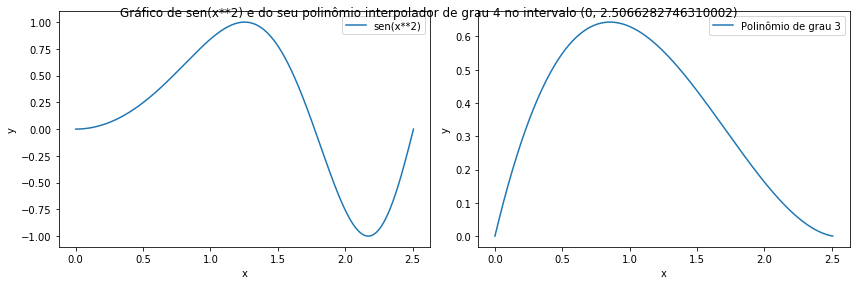

In [15]:
a, b = 0, np.sqrt(2*np.pi)
xs = np.linspace(a, b, num=1000, endpoint=True)
sin_of_xs_square = np.sin(xs**2)

poly_xs = np.linspace(a, b, num=4, endpoint=True)
poly_ys = np.sin(poly_xs**2)
interpolation_poly = lagrange(poly_xs, poly_ys)
interpolation_ys = interpolation_poly(xs)

fig, axs = plt.subplots(ncols=2, figsize=(12,4))
    
axs[0].plot(xs, sin_of_xs_square, label="sen(x**2)")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()

axs[1].plot(xs, interpolation_ys, label=f"Polinômio de grau {len(poly_xs ) - 1}")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend()

fig.suptitle(f"Gráfico de sen(x**2) e do seu polinômio interpolador de grau {len(poly_xs)} no intervalo {a, b}\n")
fig.tight_layout() # Ajusta espaçamento entre gráficos

Agora, faça o gráfico da diferença (sem valor absoluto) entre a função e o polinômio interpolador

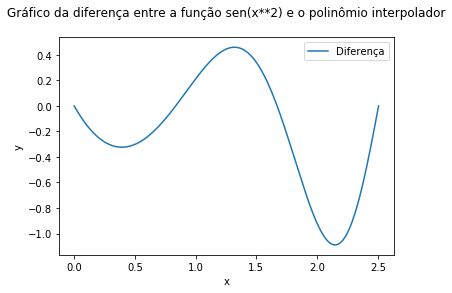

In [16]:
ax = plt.gca()

diffs = sin_of_xs_square - interpolation_ys

plt.title("Gráfico da diferença entre a função sen(x**2) e o polinômio interpolador\n")
plt.plot(xs, diffs, label="Diferença")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [17]:
assert len(ax.lines) == 1
assert ax.get_title != ""

ys = ax.lines[0].get_ydata()
assert min(ys) < -1
assert max(ys) > 0.4

Repita para o polinômio de grau 7 (que tem o dobro de coeficientes).

In [18]:
def get_chebyshev_nodes(a, b, N):
    '''Retorna os nós de chebyshev no intervalo [a, b] para um polinômio de grau N'''
    nodes = []
    for i in range(1, N+1):
        node = (a+b)/2 + (b-a)*np.cos((np.pi*(2*i-1))/(2*N))/2
        nodes.append(node)
    
    return np.asarray(nodes)

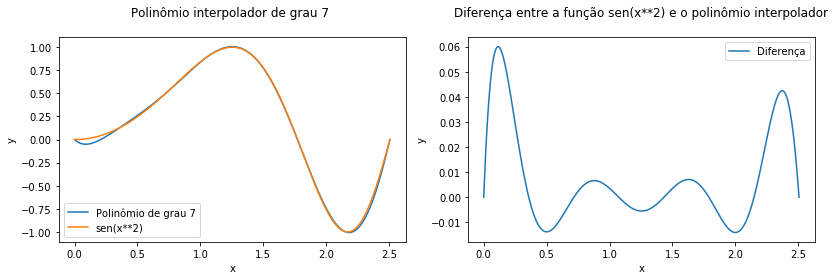

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
ax1, ax2 = axs

N = 7

poly_xs = np.linspace(a, b, num=N+1, endpoint=True)
# poly_xs = get_chebyshev_nodes(a, b, N) # Mesmo utilizando nós de Chebyshev para passar no teste
poly_ys = np.sin(poly_xs**2)

interpolation_poly = lagrange(poly_xs, poly_ys)
interpolation_ys = interpolation_poly(xs)
diffs = sin_of_xs_square - interpolation_ys

ax1.set_title(f"Polinômio interpolador de grau {N} \n")
ax1.plot(xs, interpolation_ys, label=f"Polinômio de grau {N}")
ax1.plot(xs, sin_of_xs_square, label=f"sen(x**2)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

ax2.set_title("Diferença entre a função sen(x**2) e o polinômio interpolador\n")
ax2.plot(xs, diffs, label="Diferença")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()

fig.tight_layout() # Ajusta espaçamento entre gráficos

In [20]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.title.get_text() != ""

In [21]:
assert len(ax2.lines) == 1
assert ax2.title.get_text() != ""

ys = ax2.lines[0].get_ydata()
assert np.isclose(max(ys), 0.06, atol=1e-4)
assert np.isclose(min(ys), -0.0140140, atol=1e-4)

O erro máximo é fácil de ver pelo gráfico.
Use as funções `erro1` e `erro2` para comparar, também, os erros "ao longo do intervalo inteiro".

In [22]:
abs_diff_integral = erro1(lambda x: np.sin(x**2), interpolation_poly, a, b)
sqrt_of_quadratic_diff_integral = erro2(lambda x: np.sin(x**2), interpolation_poly, a, b)

print(f"O erro medido como a integral do valor absoluto da diferença é: {abs_diff_integral}")
print(f"O erro medido como a raíz quadrada da integral do quadrado da diferença é: {sqrt_of_quadratic_diff_integral}")

O erro medido como a integral do valor absoluto da diferença é: 0.032849072657284394
O erro medido como a raíz quadrada da integral do quadrado da diferença é: 0.031436728210553974


## Questão 4: Erros e subdivisões

Para o grau $d$ do polinômio interpolador variando entre $3$ e $30$,
faça o gráfico do máximo do erro entre o polinômio interpolador e a função $\sin(x^2)$,
no mesmo intervalo $[0, \sqrt{2\pi}]$.

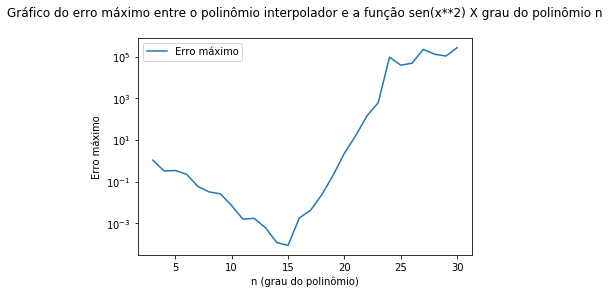

In [23]:
ns = np.arange(3, 30+1)
max_errs = []

for n in ns:
    poly_xs = np.linspace(a, b, num=n+1, endpoint=True)
    poly_ys = np.sin(poly_xs**2)
    interpolation_poly = lagrange(poly_xs, poly_ys)
    max_errs.append(erromax(interpolation_poly, lambda x: np.sin(x**2), a, b))

ax = plt.gca()

plt.title("Gráfico do erro máximo entre o polinômio interpolador e a função sen(x**2) X grau do polinômio n\n")
plt.semilogy(ns, max_errs, label="Erro máximo")
plt.xlabel("n (grau do polinômio)")
plt.ylabel("Erro máximo")
plt.legend()
plt.show()

In [24]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como o erro decai quando aumentamos $n$?

Observa-se no gráfico (em escala logarítimica no eixo y) que o erro máximo tende a decair à medida que aumentamos n até aproxidamente um polinômio de grau 15 e, a partir desse ponto, o erro máximo tende a crescer mais rapidamente do que decaiu.

Agora, repita para os 3 erros.

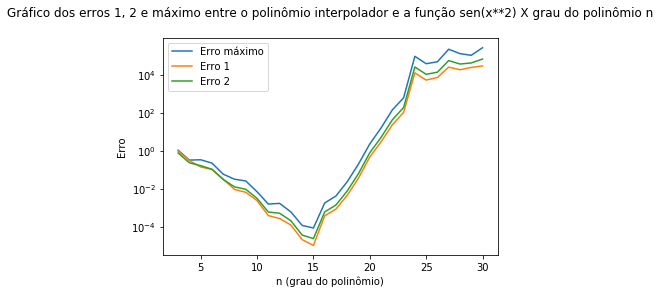

In [25]:
ns = np.arange(3,30+1)
max_errs, errs_1, errs_2 = [], [], []
for n in ns:
    poly_xs = np.linspace(a, b, num=n+1, endpoint=True)
    poly_ys = np.sin(poly_xs**2)
    interpolation_poly = lagrange(poly_xs, poly_ys)
    max_errs.append(erromax(interpolation_poly, lambda x: np.sin(x**2), a, b))
    errs_1.append(erro1(interpolation_poly, lambda x: np.sin(x**2), a, b))
    errs_2.append(erro2(interpolation_poly, lambda x: np.sin(x**2), a, b))

ax = plt.gca()

plt.title("Gráfico dos erros 1, 2 e máximo entre o polinômio interpolador e a função sen(x**2) X grau do polinômio n\n")
plt.semilogy(ns, max_errs, label="Erro máximo")
plt.semilogy(ns, errs_1, label="Erro 1")
plt.semilogy(ns, errs_2, label="Erro 2")
plt.xlabel("n (grau do polinômio)")
plt.ylabel("Erro")
plt.legend()
plt.show()

In [26]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.get_title() != ""

O que você observa?  Todos os erros decaem da mesma forma?

Sim! As expressões utilizadas para calcular os erros do gráfico e o comportamento observado indicam que os erros de interpolação 1, 2 e máximo para a função $sen(x^2)$ no intervalo $[0, \sqrt{2\pi}]$ são proporcionais entre si.